## PCA & Kernels: Swiss Army Knife of Data-Wrangling

* In this post, we are going to look at how Principal Component Analysis can help us transform our feature matrix into Principal components, which can be used to reduce the number of features in the model and also uncorrelate features by understanding explained variance by each Principal Component (PC).


* In a few cases, PCA can be treated as a <b>transformation function </b>, where <b>all</b> components can be used to better 'separate' the training data by mapping original feature matrix into a new basis (feature space), by maximizing <b> variance </b>, which helps separate classes. We also take a look at Kernels, and see the effectiveness of kernels to classify complex non-linear patterns in data. 


* We need to keep in mind that PCA is not only used as a transformation, but most importantly helps understand inherent correlations, feature distributions and uses linear transformations, which provide us with a deeper understanding through visualizations. Let us start by loading Iris dataset (easy to understand and visualize), and later move ahead to a complex dataset.

In [440]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set format to float
pd.set_option('display.float_format', '{:.2f}'.format)

In [441]:
# loading iris dataset
from sklearn.datasets import load_iris

dataset = load_iris()
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [442]:
# store into dataframe df_iris
df_iris = pd.DataFrame(dataset.data)
df_iris.columns = dataset.feature_names
df_iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris['target'] = dataset.target

df_iris.head()

sepal_length  sepal_width  petal_length  petal_width  target
0          5.10         3.50          1.40         0.20       0
1          4.90         3.00          1.40         0.20       0
2          4.70         3.20          1.30         0.20       0
3          4.60         3.10          1.50         0.20       0
4          5.00         3.60          1.40         0.20       0

* Now, let us explore the dataset using scatter plot. There are 4 features to explore in the feature matrix. Sepal length and width, petal length and width.

* By plotting Sepal length vs Sepal Width, we can see that class 0 is separated lienarly. However, separating classes 1 and 2 is not possible. Looking at Petal length vs width in scatter plot, we see that all three classes can be separated with linear decision boundaries.

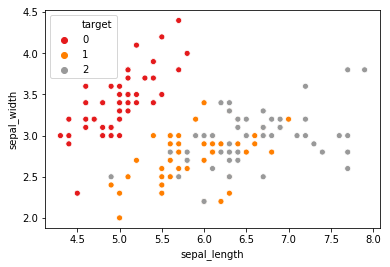

In [443]:
# Sepal length vs width: 
# Class 0 is clearly separable, but no class 1 and 2

sns.scatterplot(x=df_iris.sepal_length, y=df_iris.sepal_width, hue=df_iris.target, palette='Set1')

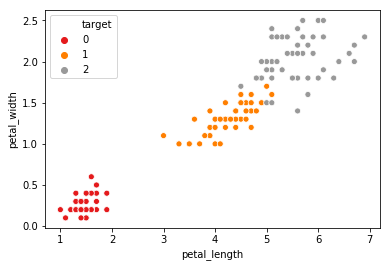

In [444]:
# Petal length vs width: 
# classes can be separated clearly (linearly separable) almost perfectly

sns.scatterplot(x=df_iris.petal_length, y=df_iris.petal_width, hue=df_iris.target, palette='Set1')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


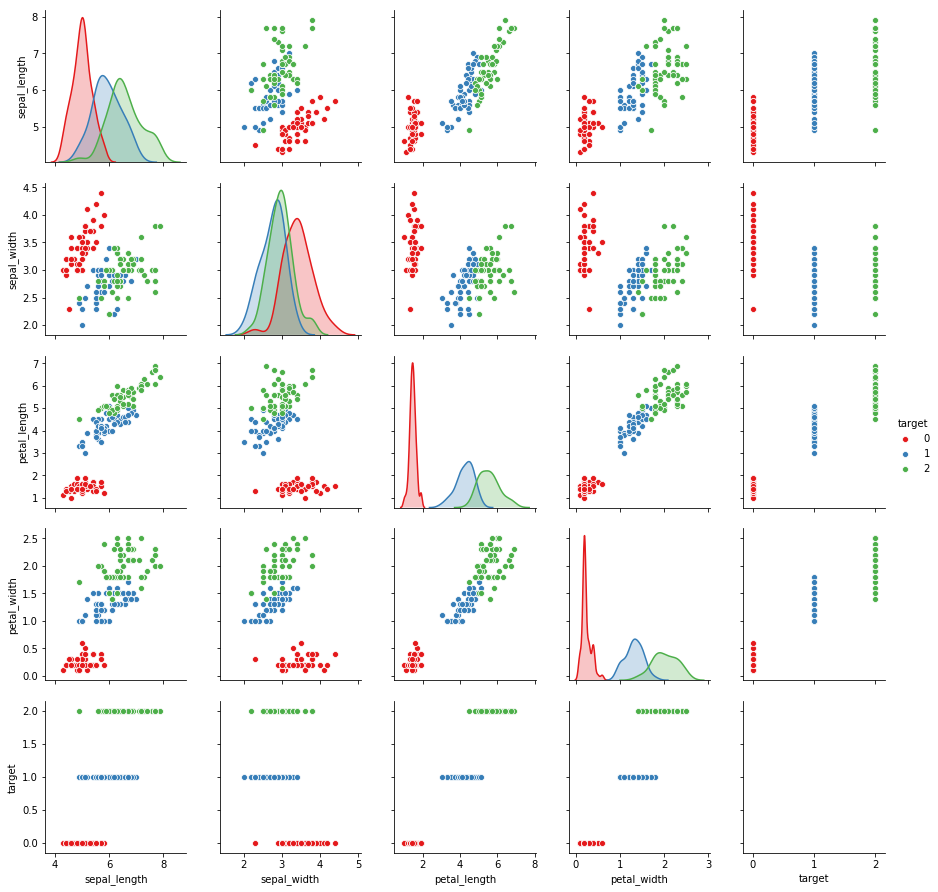

In [445]:
# we can use pairplot to look at all variables together

sns.pairplot(df_iris, hue='target', palette='Set1')

### Standardization Step

* To understand variance between each variable, we <b> standardize </b> each feature (generally Z-score standardization), to bring its variance to 1.

* For Unsupervised algorithms, dimensionality reduction and so on, it is preferred to normalize or standardize our data to remove the effects of any variable having a large range, when compared to ariables which might have small range (Maximum - Minimum value).

In [446]:
# we use standardscalar for normalization

from sklearn.preprocessing import StandardScaler
X_norm = pd.DataFrame(StandardScaler().
                      fit_transform(df_iris[['sepal_length', 'sepal_width', 
                                             'petal_length', 'petal_width']]))

X_norm.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

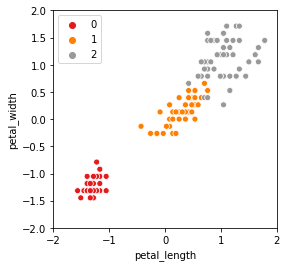

In [447]:
# plot of petal_length, petal_width after standadization

plt.figure(figsize=(4,4))
plt.xlim(-2,2)
plt.ylim(-2,2)
sns.scatterplot(x=X_norm.petal_length, y=X_norm.petal_width, 
                hue=dataset.target, palette='Set1')
plt.show()

### Covariance Step

* Covariance matrix captures covariance of two variables x,y in non-diagonal positions and captures variance across the same variable along diagonals, and is a symetric matrix. 

* Essentially, it captures the covariance, which is the joint variability of two random variables. A positive value denotes positive covariance (increase in x tends to increase in y),a dn negative covariance denotes inverse relation. 

In [448]:
# using numpys covariance method, we see that it is symetric

cov_mat = np.cov(X_norm.T)
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

### Eigen Decomposition

* The current basis of the covariance matrix is still in the original 4 axis features space. Now, this covariance matrix can be decomposed into Eigen values and Eigen vectors, which maximize variance across each feature (or minimize mean squared error between principal component and the training data points).



In [454]:
# decomposition into eigen values and vectors

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

eig_vals.shape, eig_vecs.shape

((4,), (4, 4))

In [455]:
eig_vals, eig_vecs

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

### Explained Variance 

* We observe that the Eigen values are in decreasing order of values. Now, we convert them into percentages, by divind each eigen value by the sum of all eigen values.

In [456]:
explained_variance = [x/sum(eig_vals) for x in eig_vals]
explained_variance

[0.7296244541329985,
 0.2285076178670178,
 0.03668921889282875,
 0.005178709107154802]

In [245]:
eig_vals_percent = [x/sum(eig_vals) for x in eig_vals]

In [464]:
eig_vals_percent

[0.7296244541329985,
 0.2285076178670178,
 0.03668921889282875,
 0.005178709107154802]

* From the above plot, we can conclude that the first two principal components capture (95 %) of variance. If we were to have many number of dimensions (which this case does not), not all features actually contribut to the 95 % of explained variance, hence, only a few may be required.

* Given that this case is not complex, we are going to use all the four eigen vectors to project our normalized matrix to a new basis, which is the dot product of normalized feature matrix and eigen values.

In [465]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [473]:
# ransforming to new basis

proj_X = X_norm.dot(eig_vecs)
df_pca = pd.DataFrame(proj_X)
df_pca.columns = ['PC1','PC2','PC3','PC4']
df_pca['target'] = dataset.target

df_pca.head()

PC1   PC2   PC3   PC4  target
0 -2.26 -0.48 -0.13  0.02       0
1 -2.08  0.67 -0.23  0.10       0
2 -2.36  0.34  0.04  0.03       0
3 -2.30  0.60  0.09 -0.07       0
4 -2.39 -0.65  0.02 -0.04       0

### Does PCA work ? 

* Below, we plot scatterplots with PC1 vs PC2, PC1 vs PC3, PC2 vs PC3. As we move from higher variance to lower variance, from (PC1 vs PC2) to (PC1 vs PC3) to (PC2 vs PC3), we clearly observe the capability for linear decision boundaries to separate the classes. Just op 2 components are enough to explain 95 % of variance after transforming noemalized feature matrix into the new feature space.

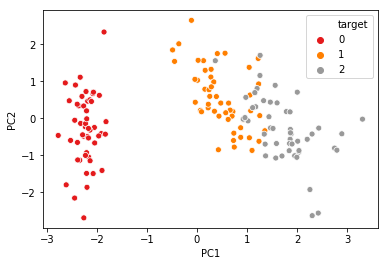

In [480]:
sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue='target', palette='Set1')

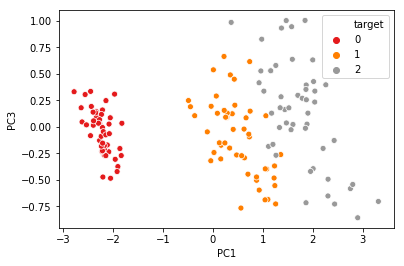

In [481]:
sns.scatterplot(x='PC1', y='PC3', data=df_pca, hue='target', palette='Set1')

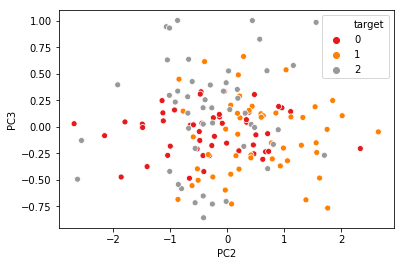

In [482]:
sns.scatterplot(x='PC2', y='PC3', data=df_pca, hue='target', palette='Set1')

* As expected, using PC3 vs PC4 becomes extremely tough for decision boundary to classify the three classes.

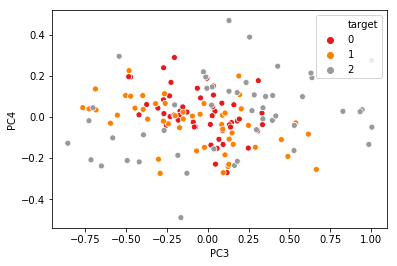

In [484]:
sns.scatterplot(x='PC3', y='PC4', data=df_pca, hue='target', palette='Set1')

### How effective is it ? 

* To recap, we standardized out original feature matrix. Later, we compute the covariance matrix of feature matrix. Then, we use Eigen decomposition to find out the eigen values and eigen vectors of covariance matrix of standardized feature matrix.


* Then, we deicide the number of components required/ number of dimensions required for our model, and multiply/ transform the normalized feature matrix into the new basis. Now, let us classify with and without using PCA with a Decision Tree Classifier.

In [529]:
# importing Decision Tree Classifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def DecisionTreeClf(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    clf = DecisionTreeClassifier(criterion='entropy')
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return accuracy_score(y_test, y_pred)

def RandomForestClf(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    clf = RandomForestClassifier(criterion='entropy')
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return accuracy_score(y_test, y_pred)
    
def LogisticRegClf(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    clf = LogisticRegression()
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return accuracy_score(y_test, y_pred)

In [530]:
# without PCA
DecisionTreeClf(df, dataset.target)

0.92

In [531]:
# with PCA
DecisionTreeClf(df_pca, dataset.target)

1.0

* Clearly, the accuracy of classifier with using PCA transformed feature matrix outperforms non-PCA feature matrix. We try other classifiers and see how they perform.

In [534]:
# without PCA
RandomForestClf(df, dataset.target), LogisticRegClf(df, dataset.target)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(0.9866666666666667, 0.9733333333333334)

In [536]:
# with PCA
RandomForestClf(df_pca, dataset.target), LogisticRegClf(df_pca, dataset.target)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(1.0, 0.96)

### Breast Cancer Dataset Example 

In [574]:
from sklearn.datasets import load_breast_cancer

cancer_dataset = load_breast_cancer()
df_cancer = pd.DataFrame(cancer_dataset['data'])
df_cancer.columns = cancer_dataset.feature_names
df_cancer.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80    1001.00             0.12   
1        20.57         17.77          132.90    1326.00             0.08   
2        19.69         21.25          130.00    1203.00             0.11   
3        11.42         20.38           77.58     386.10             0.14   
4        20.29         14.34          135.10    1297.00             0.10   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0              0.28            0.30                 0.15           0.24   
1              0.08            0.09                 0.07           0.18   
2              0.16            0.20                 0.13           0.21   
3              0.28            0.24                 0.11           0.26   
4              0.13            0.20                 0.10           0.18   

   mean fractal dimension           ...             worst radius  \
0                    0.08           ...                    25.38   
1                    0.06           ...                    24.99   
2                    0.06           ...                    23.57   
3                    0.10           ...                    14.91   
4                    0.06           ...                    22.54   

   worst texture  worst perimeter  worst area  worst smoothness  \
0          17.33           184.60     2019.00              0.16   
1          23.41           158.80     1956.00              0.12   
2          25.53           152.50     1709.00              0.14   
3          26.50            98.87      567.70              0.21   
4          16.67           152.20     1575.00              0.14   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0               0.67             0.71                  0.27            0.46   
1               0.19             0.24                  0.19            0.28   
2               0.42             0.45                  0.24            0.36   
3               0.87             0.69                  0.26            0.66   
4               0.20             0.40                  0.16            0.24   

   worst fractal dimension  
0                     0.12  
1                     0.09  
2                     0.09  
3                     0.17  
4                     0.08  

[5 rows x 30 columns]

#### Standardization Step 

In [575]:
from sklearn.preprocessing import StandardScaler

X_norm = pd.DataFrame(StandardScaler().
                      fit_transform(df_cancer))

In [576]:
X_norm.head()

0     1     2     3     4     5     6    7     8     9   ...     20  \
0  1.10 -2.07  1.27  0.98  1.57  3.28  2.65 2.53  2.22  2.26  ...   1.89   
1  1.83 -0.35  1.69  1.91 -0.83 -0.49 -0.02 0.55  0.00 -0.87  ...   1.81   
2  1.58  0.46  1.57  1.56  0.94  1.05  1.36 2.04  0.94 -0.40  ...   1.51   
3 -0.77  0.25 -0.59 -0.76  3.28  3.40  1.92 1.45  2.87  4.91  ...  -0.28   
4  1.75 -1.15  1.78  1.83  0.28  0.54  1.37 1.43 -0.01 -0.56  ...   1.30   

     21    22    23    24    25    26   27    28    29  
0 -1.36  2.30  2.00  1.31  2.62  2.11 2.30  2.75  1.94  
1 -0.37  1.54  1.89 -0.38 -0.43 -0.15 1.09 -0.24  0.28  
2 -0.02  1.35  1.46  0.53  1.08  0.85 1.96  1.15  0.20  
3  0.13 -0.25 -0.55  3.39  3.89  1.99 2.18  6.05  4.94  
4 -1.47  1.34  1.22  0.22 -0.31  0.61 0.73 -0.87 -0.40  

[5 rows x 30 columns]

In [586]:
# importing PCA from scikit library

from sklearn.decomposition import PCA
pca = PCA(n_components=X_norm.shape[1]).fit(X_norm)

In [587]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

0.9515688143366666

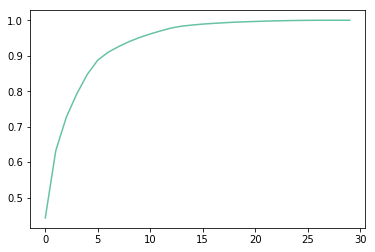

In [590]:
# Hence, we need the first 11 components of 30 components to explain around 95 % variance.

plt.plot(np.arange(0,len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))

sum(pca.explained_variance_ratio_[:10])

#### Transformation Step 

* Here, we use only 11 components of the 30 components available to us, as 95 % of variance is explained by top 11 components put together.

* Now, let us check the top components and bottom components visually, to see the classes separate visually.

In [619]:
# Setting first 11 components, we fit and transform the standardized feature matrix

X_transformed = pd.DataFrame(PCA(n_components=11).fit_transform(X_norm))
X_transformed.columns = ['PC' + str(i+1) for i in range(0,X_transformed.shape[1])]

In [620]:
X_transformed.shape

(569, 11)

* We see visually from PC1 vs PC2, that classes can be separated on these two axes. Moving ahead to PC2 vs PC3, we see that separation is not as clear. As we go to PC10 vs PC11, it becomes much harder to separate the classes.

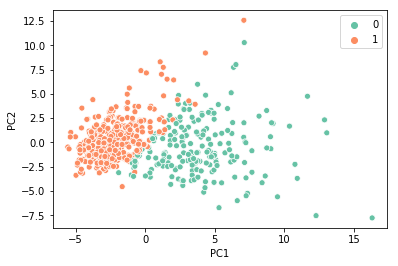

In [623]:
sns.scatterplot(X_transformed['PC1'], X_transformed['PC2'], hue=cancer_dataset.target)

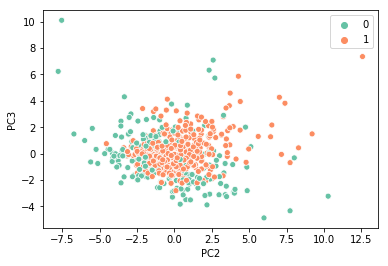

In [624]:
sns.scatterplot(X_transformed['PC2'], X_transformed['PC3'], hue=cancer_dataset.target)

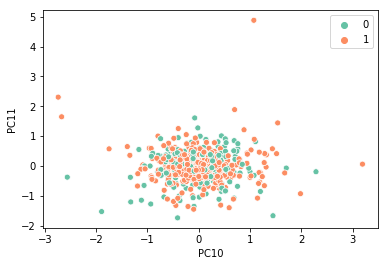

In [625]:
sns.scatterplot(X_transformed['PC10'], X_transformed['PC11'], hue=cancer_dataset.target)

### Did PCA work in this example ? Let us verify

* In this case, we reduced number of features from 30 to just 13 (actual features mapped into Principal components), hence reducing the model complexity. 

* In terms of performance, the transformed data performs slightly better than the original feature matrix. (Accuracy measure)

In [631]:
DecisionTreeClf(df_cancer, cancer_dataset.target), RandomForestClf(df_cancer, cancer_dataset.target)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.9192982456140351, 0.9578947368421052)

In [632]:
DecisionTreeClf(X_transformed, cancer_dataset.target), RandomForestClf(X_transformed, cancer_dataset.target)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.9368421052631579, 0.9614035087719298)